# Algorithms: principal component analysis

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)  
This work by Yuan-Ching Li, Jephian Lin, Wei-Chen Pan, and An-Rong Wu is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

In [198]:
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Principal component analysis
The principal component analysis (PCA) is a method  
to extract important information from high-dimensional data.  
In other words, it is a method of **dimensionality reduction**.

Say $X$ is an $N\times d$ array such that  
each row of $X$ is a sample while  
each column records the features of each sample.

The PCA extract the information by  
finding a orthonormal set of $\ell$ vectors called the **principal components**,  
where $\ell$ is the target dimension.  

Each principal component ${\bf v}$ represent a new feature.  
A sample, say the $i$-th row ${\bf r}_i$ of $X$,  
receives this new feature as ${\bf r}_i\cdot {\bf v}$,  
which is the projection of ${\bf r}_i$ onto ${\bf v}$.

A picture

### Mean and variance

Let ${\bf x} = (x_1,\ldots, x_N)^\top$ be a column of $X$.  
The **mean** of ${\bf x}$ is $\mu({\bf x}) = \frac{1}{N}\sum_{i=1}^N x_i$.  
Equivalently, $\mu({\bf x}) = \frac{1}{N}{\bf 1}^\top{\bf x}$,  
where ${\bf 1}$ is the all-ones vector.  

Note that $\frac{1}{N}J{\bf x} = \mu({\bf x}){\bf 1}$.

If we want the data ${\bf x}$ to be centered at $0$,  
then we may replace ${\bf x}$ with $(x_1-\mu, \ldots, x_N-\mu)^\top$,  
where $\mu = \mu({\bf x})$.

To do this,  
let ${\bf x}\leftarrow {\bf x} - \mu{\bf 1} = I{\bf x} - \frac{1}{N}J{\bf x} = (I - \frac{1}{N}J){\bf x}$.
Denote $H = I - \frac{1}{N}J$.

Let ${\bf y} = (y_1,\ldots,y_N)^\top$ be another column of $X$.  
The **covariance** between ${\bf x}$ and ${\bf y}$ is  
$\frac{1}{N}\sum_{i=1}^N (x_i - \mu({\bf x}))(y_i - \mu({\bf y}))$.  
When $\mu({\bf x}) = \mu({\bf y}) = 0$,  
the covariance is simply ${\bf x}\cdot {\bf y}$. 


Therefore, if each column of $X$ is centered at $0$,  
then $\frac{1}{N}X^\top X$ is the **feature covariance matrix**,  
which records the covariance between the $i$-th and the $j$-th feature.

Let ${\bf c} = (c_1,\ldots, c_d)^\top$ be a vector of coefficients.  
Then $X{\bf c}$ defines a new feature $c_1{\bf x}^1 + \cdots + c_d{\bf x}^d$,  
where ${\bf x}^i$ is the $i$-th column of $X$.  

The gist of PCA is to find ${\bf c}$  
that maximizes the covariance between $X{\bf c}$ and itself,  
which is also the **variance** of $X{\bf c}$.  

### Algorithm

Let `X` be a dataset of shape `(N, d)`.  
Let `l` be the target dimension.  

1. Replace `X` by `HX` to make each column centered at `0`.  
2. Calculate the feature covariance matrix `C = X.T.dot(X) / N`. 
3. Calculate the `l` largest eigenvalues `eigs` as an array.  
4. Calculate the orthonomal eigenvectors `vecs` corresponding to eigenvalues in `eigs`.  
(`vecs` is of shape `(d, l)`.)  
5. The columns of `vecs` are the principal components.  
6. The matrix `X_new = X.dot(vecs)` is the new dataset of shape `(N, l)`.
7. The matrix `X_new.dot(vecs.T)` is the projection in the original space.

### Examples
Run the sample code at the bottom first.

##### Make-up data

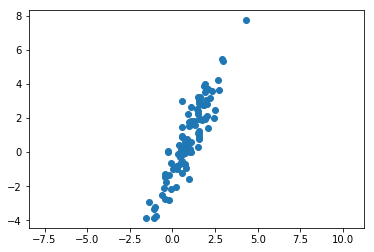

In [207]:
mean = np.array([1,1])
cov = np.array([
        [1,2],
        [2,5]
    ])
X = np.random.multivariate_normal(mean, cov, 100)

plt.axis('equal')
plt.scatter(X[:,0], X[:,1])

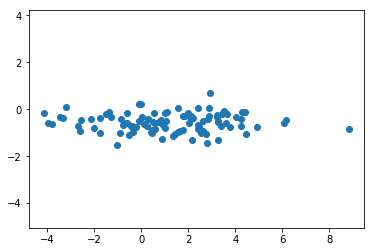

In [208]:
model = PCA()
new_X = model.fit_transform(X, 2)

plt.axis('equal')
plt.scatter(new_X[:,0], new_X[:,1])

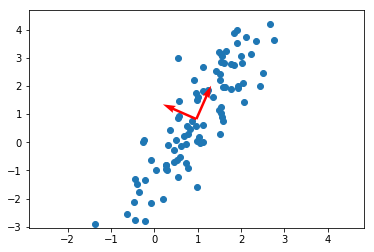

In [212]:
model.show(vec_len=1, zoom=3)

##### Iris data

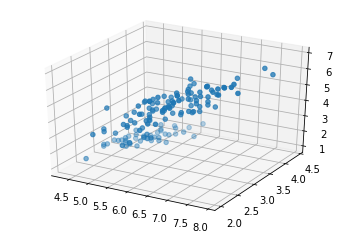

In [203]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:,:3] ### take only the first three dimensions 

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2])

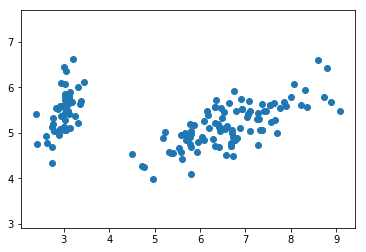

In [204]:
model = PCA()
X_new = model.fit_transform(X, 2)

plt.axis('equal')
plt.scatter(X_new[:,0], X_new[:,1])

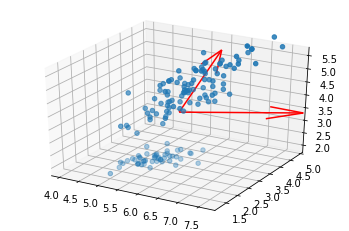

In [205]:
model.show(vec_len=3, zoom=3)

***Sample code for PCA***

In [206]:
class PCA:
    def __init__(self):
        pass
       
    def fit(self, data, l=2):
        self.data = data
        self.mean = self.data.mean(axis=0)
        self.data_shifted = self.data - self.mean
        self.l = l
        
        N,d = self.data.shape
        C = (1/N)*self.data_shifted.T.dot(self.data_shifted)          ### define M as the feature-covariance matrix
        self.eigs, self.vecs = LA.eigh(C, eigvals=(d-self.l, d-1))
        self.eigs = self.eigs[::-1]
        self.vecs = self.vecs[:,::-1]
        
    def transform(self):
        self.data_new = self.data.dot(self.vecs)
        self.pullback = self.data_new.dot(self.vecs.T)
        return self.data_new
    
    def fit_transform(self, data, l=2):
        self.fit(data, l)
        return self.transform()
    
    # 畫出投影前的資料以及主方向
    def show(self, vec_len=3, zoom=3):
        N,d = self.data.shape
        ran = self.data.max(axis=0) - self.data.min(axis=0)
        l = (1/zoom) * ran.max()
        if d == 2:
            fig = plt.figure()
            ax = plt.axes()
            ax.set_xlim(self.mean[0]-l, self.mean[0]+l)
            ax.set_ylim(self.mean[1]-l, self.mean[1]+l)
            plt.scatter(self.data[:,0], self.data[:,1], cmap='viridis')
            ax.quiver(self.mean[0], self.mean[1], 
                      *self.vecs, 
                      units='xy', scale=1/vec_len, color='red')
#             plt.arrow(self.mean[0], self.mean[1], self.vecs[0,0], self.vecs[1,0])
#             plt.arrow(self.mean[0], self.mean[1], self.vecs[0,1], self.vecs[1,1])
            
        elif d == 3:
            fig = plt.figure()
            ax = plt.axes(projection='3d')
            ax.scatter(self.data[:,0], self.data[:,1], self.data[:,2], cmap='viridis')
            ax.set_xlim(self.mean[0]-l, self.mean[0]+l)
            ax.set_ylim(self.mean[1]-l, self.mean[1]+l)
            ax.set_zlim(self.mean[2]-l, self.mean[2]+l)
            l = max(max(self.data[:,0])-np.mean(self.data[:,0]),max(self.data[:,1])-np.mean(self.data[:,1]),max(self.data[:,2])-np.mean(self.data[:,2]))
            ax.quiver(self.mean[0], self.mean[1], self.mean[2], 
                      *self.vecs, 
                      length=vec_len, color='red')
            plt.show()
            
        else:
            print("d should be 2 or 3.")